# Exploring Music Sales Data

This notebook is an exploration into some data about music sales. The aim here is to just get a feel for the dataset, explore patterns over time and see how different formats and metrics have changed over the years.

We'll be using **Pandas**, **Seaborn** and **Matplotlib** for our analysis and visuals.

### Importing the data

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("MusicData.csv")

### Initial look at the data

Just looking at the first few rows, checkings for nulls and reviewing column types to understand the structure.

In [43]:
df.head()

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3008 non-null   int64  
 1   Format             3008 non-null   object 
 2   Metric             3008 non-null   object 
 3   Year               3008 non-null   int64  
 4   Number of Records  3008 non-null   int64  
 5   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 141.1+ KB


### Exploring unique categories

Looking at unique formats and metrics to get a better idea of what dimensions we'll be working with.

In [45]:
df.describe()

,index,Year,Number of Records,Value (Actual)
count,3008.00000,3008.000000,3008.0,1351.000000
mean,1503.50000,1996.000000,1.0,781.291237
std,868.47913,13.566915,0.0,2246.837672
min,0.00000,1973.000000,1.0,-7.650944
25%,751.75000,1984.000000,1.0,3.700228
50%,1503.50000,1996.000000,1.0,63.900000
75%,2255.25000,2008.000000,1.0,448.900000
max,3007.00000,2019.000000,1.0,19667.327786


In [46]:
df["Format"].unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital',
       'Paid Subscription', 'SoundExchange Distributions',
       'Synchronization'], dtype=object)

In [47]:
df["Metric"].unique()

array(['Units', 'Value', 'Value (Adjusted)'], dtype=object)

In [48]:
df.head()

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN


### Top 5 Years by Mean Value

These are the top 5 years with the highest average value in the dataset.

In [49]:
yearly_mean = df.groupby("Year")["Value (Actual)"].mean().sort_values(ascending=False).head(5)
yearly_mean

Year
1999    1657.666796
1978    1619.793357
2000    1594.287116
1998    1580.017487
1995    1482.642970
Name: Value (Actual), dtype: float64

Here's a simple bar chart showing those top 5 years visually.

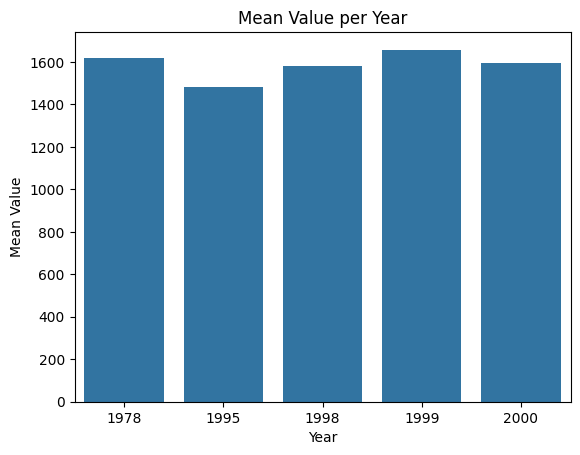

In [50]:
sns.barplot(x=yearly_mean.index, y=yearly_mean.values)
plt.title("Mean Value per Year")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.show()

### Most Common Formats

These are the top 5 most common formats in the dataset

In [51]:
df["Format"].value_counts().head(5)

Format
CD                 141
CD Single          141
Cassette           141
Cassette Single    141
LP/EP              141
Name: count, dtype: int64

### Value Over Time

We'll plot how the overall value has changed over the years. This might help spot any trends or shifts in the industry.

In [52]:
df_sorted = df.sort_values("Year")
df_sorted.head(5)

,index,Format,Metric,Year,Number of Records,Value (Actual)
1598,1598,Other Tapes,Value,1973,1,15.6
1645,1645,Paid Subscription,Value,1973,1,NaN
1692,1692,Ringtones & Ringbacks,Value,1973,1,NaN
2726,2726,Paid Subscription,Value (Adjusted),1973,1,NaN
1457,1457,On-Demand Streaming (Ad-Supported),Value,1973,1,NaN


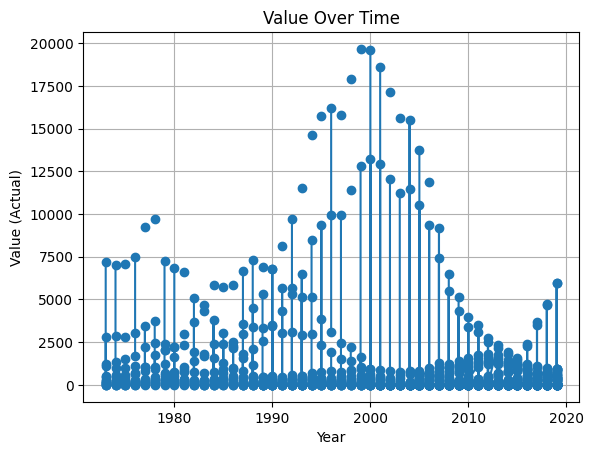

In [53]:
plt.plot(df_sorted["Year"], df_sorted["Value (Actual)"], marker="o")
plt.title("Value Over Time")
plt.xlabel("Year")
plt.ylabel("Value (Actual)")
plt.grid(True)
plt.show()

### Aggregating by Format and Metric

We'll aggregate values to see which formats and metrics contribute the most.

In [54]:
df.groupby("Format")["Value (Actual)"].mean()

Format
8 - Track                              511.177231
CD                                    4733.432620
CD Single                               45.346843
Cassette                              1403.643775
Cassette Single                        126.793441
DVD Audio                                2.699240
Download Album                         523.063861
Download Music Video                    16.108696
Download Single                        956.128235
Kiosk                                    2.843023
LP/EP                                  905.310691
Limited Tier Paid Subscription         614.897193
Music Video (Physical)                 198.247984
On-Demand Streaming (Ad-Supported)     452.028121
Other Ad-Supported Streaming           214.019553
Other Digital                           19.121265
Other Tapes                              5.971933
Paid Subscription                     1417.139072
Paid Subscriptions                      12.118509
Ringtones & Ringbacks                  299.

In [55]:
df.groupby("Metric")["Value (Actual)"].mean()

Metric
Units                 98.942532
Value                856.938013
Value (Adjusted)    1453.550503
Name: Value (Actual), dtype: float64

In [56]:
df.groupby(["Year", "Format"])["Value (Actual)"].mean().reset_index()

,Year,Format,Value (Actual)
0,1973,8 - Track,1131.893941
1,1973,CD,NaN
2,1973,CD Single,NaN
3,1973,Cassette,176.203694
4,1973,Cassette Single,NaN
...,...,...,...
1123,2019,Ringtones & Ringbacks,17.153081
1124,2019,SACD,0.294753
1125,2019,SoundExchange Distributions,908.200000
1126,2019,Synchronization,276.262360


### Distribution by Format

We'll use a boxplot to visualise how the values are spread across different formats. This helps spot outliers and variability.

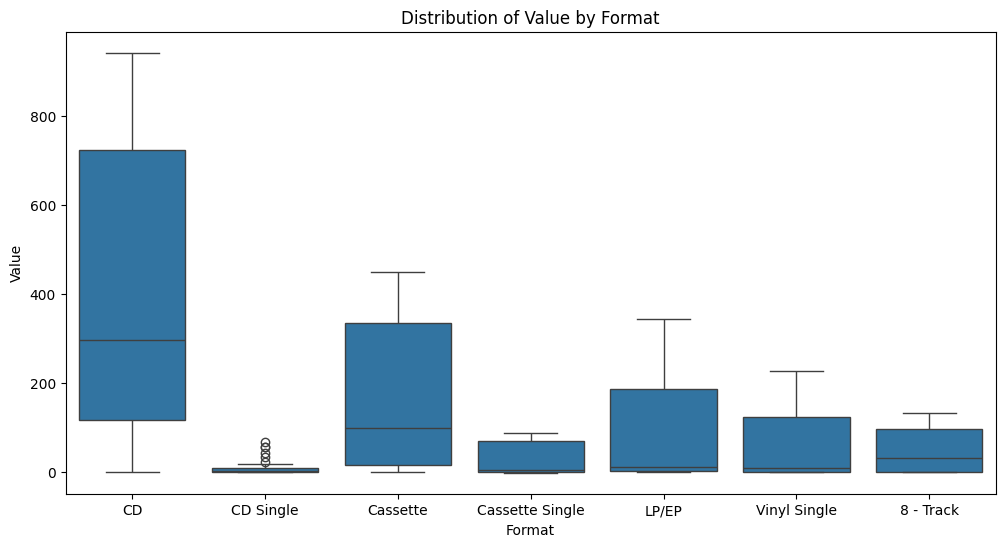

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Format", y="Value (Actual)", data=df.head(300))
plt.title("Distribution of Value by Format")
plt.xlabel("Format")
plt.ylabel("Value")
plt.show()

### Relationships Between Columns

We'll use a pairplot to see how Year, Number of Records and Value (Actual) relate to each other, split by format.

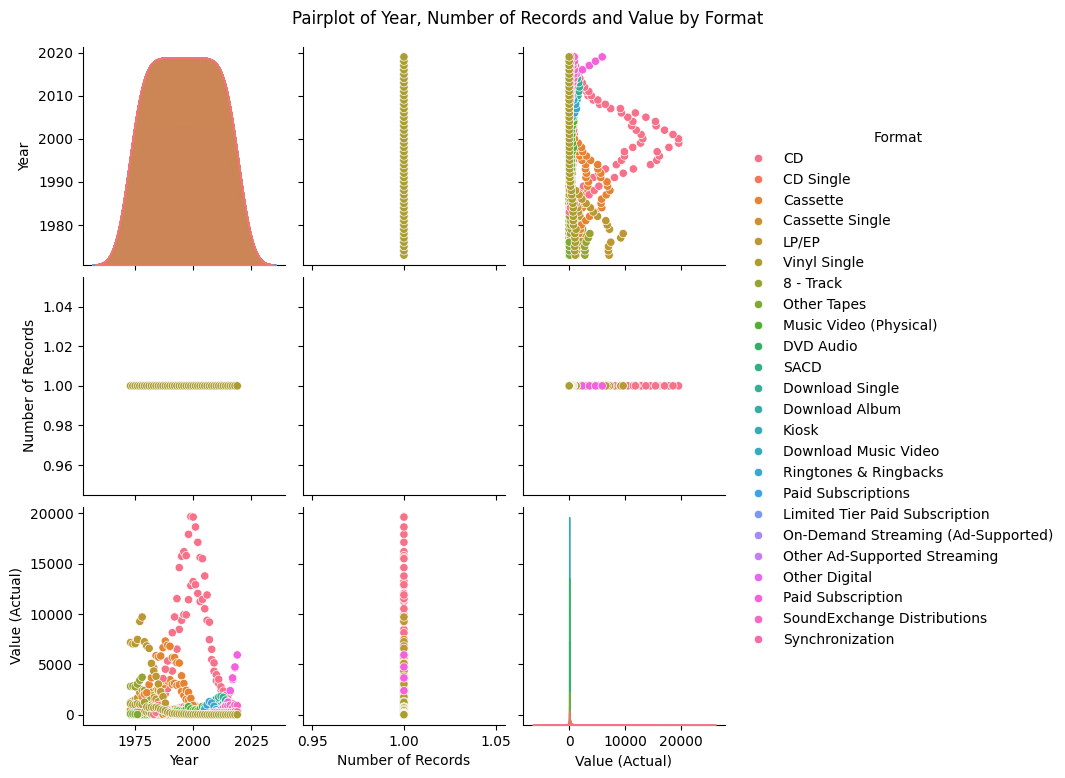

In [58]:
sns.pairplot(df, vars=["Year", "Number of Records", "Value (Actual)"], hue="Format")
plt.suptitle("Pairplot of Year, Number of Records and Value by Format", y=1.03)
plt.show()

### Stacked Bar Chart of Value per Year by Metric

This gives us a sense of how each metric adds to the total value for each year. 

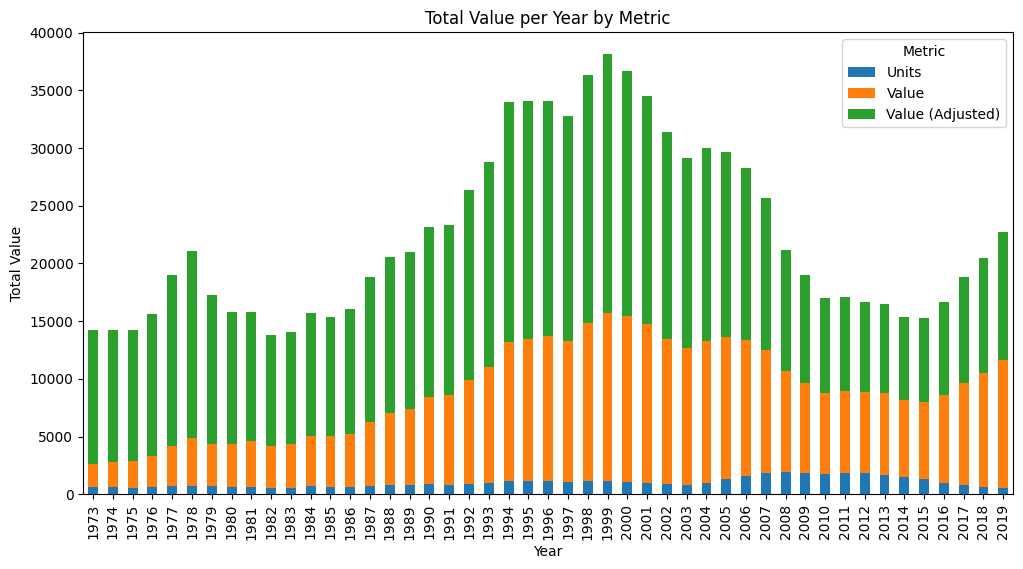

In [59]:
year_metric_sum = df.groupby(["Year", "Metric"])["Value (Actual)"].sum().unstack()
year_metric_sum.plot(kind="bar", stacked=True,figsize=(12, 6))
plt.title("Total Value per Year by Metric")
plt.xlabel("Year")
plt.ylabel("Total Value")
plt.show()

### Average Value per Format Over the Years

Finally, here's a line plot showing how each format's average value changes over time. It's useful for spotting rising or declining formats.

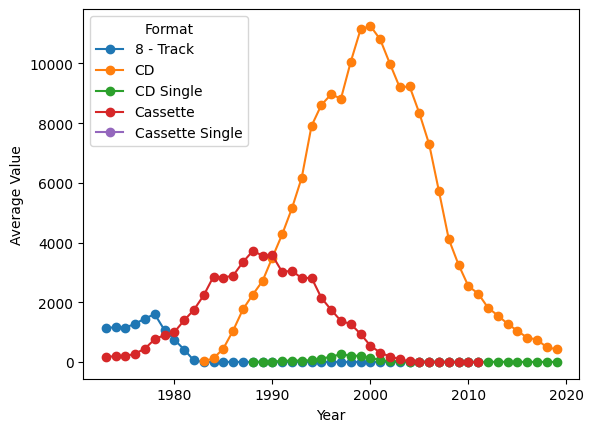

In [60]:
format_year_avg = df.groupby(["Format", "Year"])["Value (Actual)"].mean().head(200).unstack()
format_year_avg.T.plot(marker="o")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.show()